# Shi-Tomasi method

In [15]:
from PIL import Image
from pylab import *
from scipy import ndimage
from scipy.ndimage import filters
import numpy as np
import math

In [16]:
def Shi_Tomasi_cornerness_measure(im, window_size, sigma = 3) :
      
    Ix = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), Ix) # storing x derivate of the input image
    
    Iy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), Iy) # storing y derivate of the input image
    
    # Calculating the elements of the momment matrix
    Ixx = ndimage.uniform_filter(Ix * Ix, window_size)
    Ixx = window_size*Ixx # sum(Ixx around 3*3 window)
    
    Iyy = ndimage.uniform_filter(Iy * Iy, window_size)
    Iyy = window_size*Iyy # sum(Iyy around 3*3 window)
    
    Ixy = ndimage.uniform_filter(Ix * Iy, window_size)
    Ixy = window_size*Ixy # sum(Ixy around 3*3 window)
    
    # Finding the eigen values for every pixel
    lambda_1 = 1/2*( (Ixx + Iyy) + np.sqrt(4*Ixy*Ixy + (Ixx - Iyy)**2) )
    lambda_2 = 1/2*( (Ixx + Iyy) - np.sqrt(4*Ixy*Ixy + (Ixx - Iyy)**2) )
      
    # lambda min is the cornerness measure for Shi_tomasi method
    lambda_min = zeros(im.shape)
    lambda_min = np.minimum(lambda_1, lambda_2)
    
    return (lambda_min)


In [17]:
def Shi_Tomasi_coords(lambda_min, threshold, min_dist):
    coords = np.argwhere(lambda_min > threshold)
    lambda_values = [lambda_min[c[0],c[1]] for c in coords] # getting the lambda values for every coordinate
    index = argsort(lambda_values)  #sort the index values of lambda_values
    window = zeros(lambda_min.shape) #window by taking every value as one
    window[min_dist:-min_dist, min_dist:-min_dist] = 1
    # select the best points taking min_distance into account
    localMax_coords = [] 
    for i in index:
        if (window[coords[i,0],coords[i,1]] == 1):
            localMax_coords.append(coords[i])
            window[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
            (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return (localMax_coords) # returning the localmax of lambda coords

In [18]:
def plot_Shi_Tomasi_coords(image,coords):
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in coords],[p[0] for p in coords], 'r.')
    axis('off')
    show()

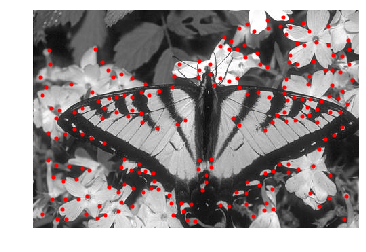

In [19]:
im1 = array(Image.open('Image1.jpg').convert('L'))
lambda_min = Shi_Tomasi_cornerness_measure(im1, sigma = 3, window_size = 9)
coords = Shi_Tomasi_coords(lambda_min, threshold=122, min_dist=10)
plot_Shi_Tomasi_coords(im1, coords)


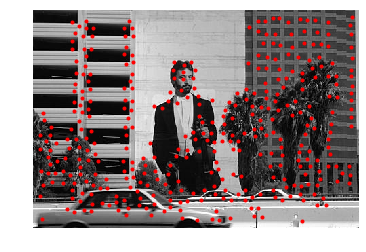

In [20]:
im2 = array(Image.open('Image2.jpg').convert('L'))
lambda_min = Shi_Tomasi_cornerness_measure(im2, sigma = 3, window_size = 9)
coords = Shi_Tomasi_coords(lambda_min, threshold=34, min_dist=10)
plot_Shi_Tomasi_coords(im2, coords)

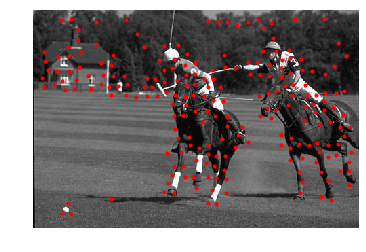

In [21]:
im3 = array(Image.open('Image3.jpg').convert('L'))
lambda_min = Shi_Tomasi_cornerness_measure(im3, sigma = 3, window_size = 9)
coords = Shi_Tomasi_coords(lambda_min, threshold=18, min_dist=12)
plot_Shi_Tomasi_coords(im3, coords)

# Harris_corner method

In [22]:
def Harris_corner_cornerness_measure(im, sigma, alpha, window_size) :
    
    # Calculating the gradients of the image
    Ix = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), Ix) # storing x derivate of the input image
    Iy = zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (1,0), Iy) # storing y derivate of the input image
    
    # Calculating the elements of the momment matrix
    Ixx = ndimage.uniform_filter(Ix * Ix, window_size)
    Ixx = window_size*Ixx # sum(Ixx around 3*3 window)
    
    Iyy = ndimage.uniform_filter(Iy * Iy, window_size)
    Iyy = window_size*Iyy # sum(Iyy around 3*3 window)
    
    Ixy = ndimage.uniform_filter(Ix * Iy, window_size)
    Ixy = window_size*Ixy # sum(Ixy around 3*3 window)
    
    # Finding the eigen values for every pixel
    lambda_1 = 1/2*( (Ixx + Iyy) + np.sqrt(4*Ixy*Ixy + (Ixx - Iyy)**2) )
    lambda_2 = 1/2*( (Ixx + Iyy) - np.sqrt(4*Ixy*Ixy + (Ixx - Iyy)**2) )
      
    # lambda min is the cornerness measure for Shi_tomasi method
    f = zeros(im.shape)
    f = (lambda_1 * lambda_2) - alpha * ((lambda_1 + lambda_2) ** 2)
    #f = (lambda_1*lambda_2) /(lambda_1 + lambda_2)
    
    return (f)

In [23]:
def harris_coords(f, threshold, min_dist):
    coords = np.argwhere(f > threshold)
    f_values = [f[c[0],c[1]] for c in coords] # getting the f values for every coordinate
    index = argsort(f_values)  #sort the index values of f_values
    window = zeros(f.shape) #window by taking every value as one
    window[min_dist:-min_dist, min_dist:-min_dist] = 1
    # select the best points taking min_distance into account
    localMax_coords = [] 
    for i in index:
        if (window[coords[i,0],coords[i,1]] == 1):
            localMax_coords.append(coords[i])
            window[(coords[i,0]-min_dist):(coords[i,0]+min_dist),
            (coords[i,1]-min_dist):(coords[i,1]+min_dist)] = 0
    return (localMax_coords) # returning the localmax of f coords

In [24]:
def plot_harris_coords(image,coords):
    figure()
    gray()
    imshow(image)
    plot([p[1] for p in coords],[p[0] for p in coords], 'r.')
    axis('off')
    show()

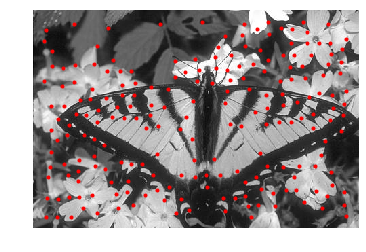

In [42]:
f = Harris_corner_cornerness_measure(im1, sigma = 3, alpha = 0.03, window_size = 9)
coords = harris_coords(f, threshold=10000, min_dist=15)
plot_harris_coords(im1, coords)

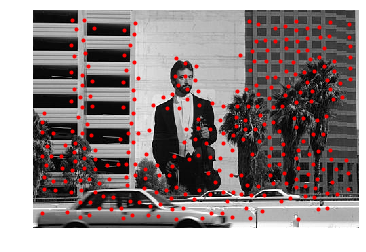

In [58]:
f = Harris_corner_cornerness_measure(im2, sigma = 3, alpha = 0.03, window_size = 9)
coords = harris_coords(f, threshold=800, min_dist=13)
plot_harris_coords(im2, coords)

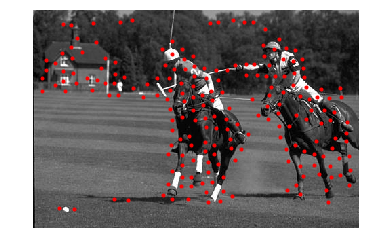

In [61]:
f = Harris_corner_cornerness_measure(im3, sigma = 3, alpha = 0.02, window_size = 9)
coords = harris_coords(f, threshold=1000, min_dist=13)
plot_harris_coords(im3, coords)